<a href="https://colab.research.google.com/github/Rkinbag/pipelines-feature-select-demo-/blob/main/featureop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('regression.csv')


In [3]:
df.head()


,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [4]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

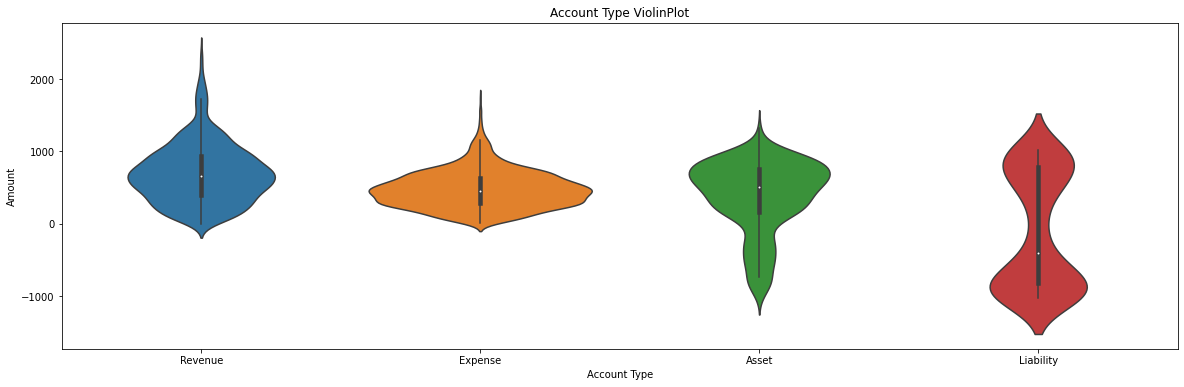

In [6]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Type ViolinPlot')
plt.show()

In [7]:
monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

In [8]:
monthmap['Jan']


1

In [9]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])


In [10]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1


In [12]:
df['Day'] = 1



In [13]:
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)


In [14]:
df['Date'] = pd.to_datetime(df['Date'])



In [15]:
df.dtypes


Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [16]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


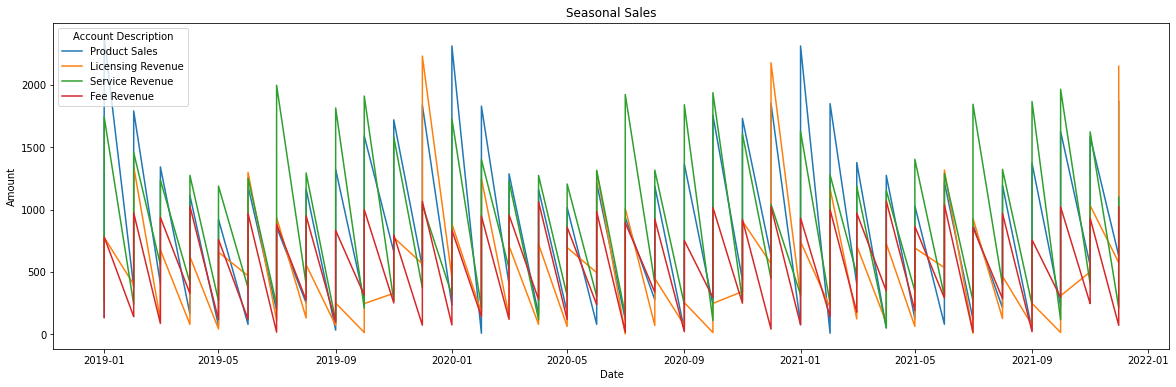

In [17]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')
plt.show()

In [18]:
df.corr()


,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


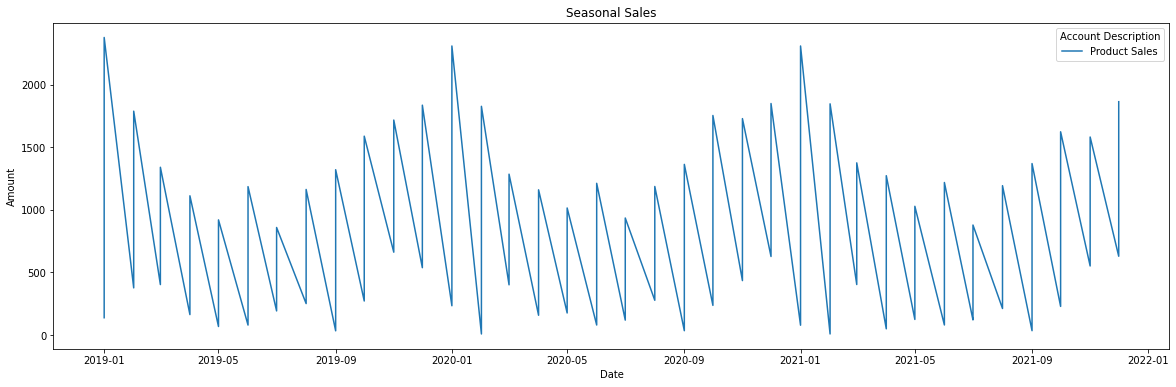

In [19]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Product Sales']).set_title('Seasonal Sales')
plt.show()

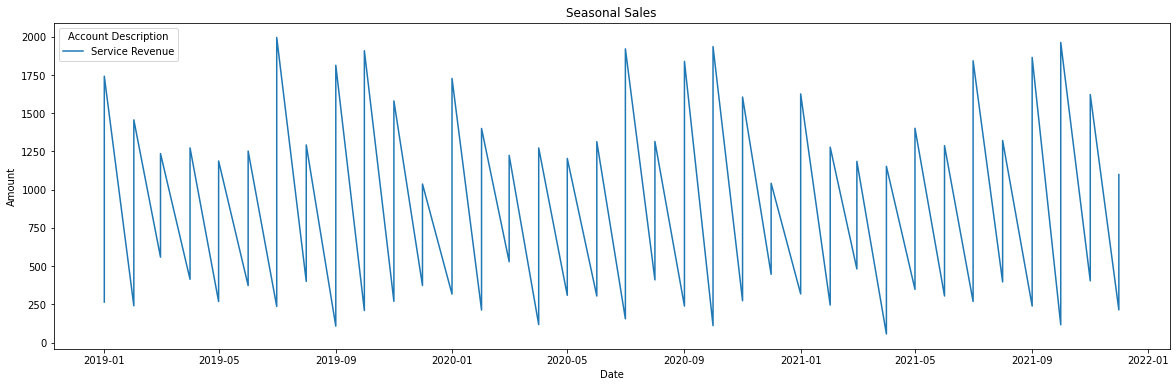

In [20]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Service Revenue']).set_title('Seasonal Sales')
plt.show()

In [21]:
df['Account Description'].unique()


array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [22]:
df['Account'] = 'ACC' + df['Account'].astype(str)


In [23]:
df['Year'] = df['Year'].astype(str)


In [24]:
df.drop(['Period', 'Day', 'Date'], axis=1, inplace=True)


In [25]:
df.dtypes


Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [26]:
df['AccountVal'] = df['Account'] + df['Account Description']


In [27]:
df.drop(['Account Description', 'AccountVal'], axis=1, inplace=True)


In [37]:
df = pd.get_dummies(df)


In [38]:
X = df.drop('Amount', axis=1)
y = df['Amount']

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)




In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [42]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}


In [43]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError


In [45]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [48]:
from sklearn.metrics import r2_score, mean_absolute_error


In [49]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.9342019743760693 MAE:76.33576577531646
gb scores - R2:0.6353516501682552 MAE:190.8419509203904
ridge scores - R2:0.5093625023110633 MAE:224.88706328103038
lasso scores - R2:0.509750861393047 MAE:224.4782275114179
enet scores - R2:0.5086617173444186 MAE:225.02988780517327


In [50]:
best_model = fit_models['rf']


In [51]:
best_model.predict(X_test)


array([ 551.9051 ,  601.05151,  461.44576, ..., -481.12   ,  624.83343,
       1064.71953])

In [52]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.03965533, 0.03095771, 0.02383489, 0.01199218, 0.00876497,
       0.01333429, 0.01442608, 0.01422997, 0.01794496, 0.01495795,
       0.        , 0.01195769, 0.00966029, 0.02223985, 0.00583016,
       0.00467168, 0.        , 0.        , 0.        , 0.00299383,
       0.01207517, 0.00966647, 0.01035457, 0.02723518, 0.03178667,
       0.0269293 , 0.03887078, 0.0171808 , 0.00765833, 0.02577865,
       0.03495276, 0.03295866, 0.01315909, 0.10451832, 0.05445356,
       0.01747687, 0.18064859, 0.08376191, 0.09284415, 0.18165774,
       0.07516703])

In [53]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Account Type_Liability    0.181658
Account_ACC4000001        0.180649
Account_ACC3000000        0.104518
Account Type_Expense      0.092844
Account Type_Asset        0.083762
Account Type_Revenue      0.075167
Account_ACC3000001        0.054454
Year_2019                 0.039655
Account_ACC1000002        0.038871
Account_ACC2000002        0.034953
Account_ACC2000003        0.032959
Account_ACC1000000        0.031787
Year_2020                 0.030958
Cost Centre_CC302         0.027235
Account_ACC1000001        0.026929
Account_ACC2000001        0.025779
Year_2021                 0.023835
Month_Oct                 0.022240
Month_Jul                 0.017945
Account_ACC3000002        0.017477
Account_ACC1000004        0.017181
Month_Jun                 0.014958
Month_Feb                 0.014426
Month_Jan                 0.014230
Month_Dec                 0.013334
Account_ACC2000005        0.013159
Cost Centre_CC202         0.012075
Month_Apr                 0.011992
Month_May           

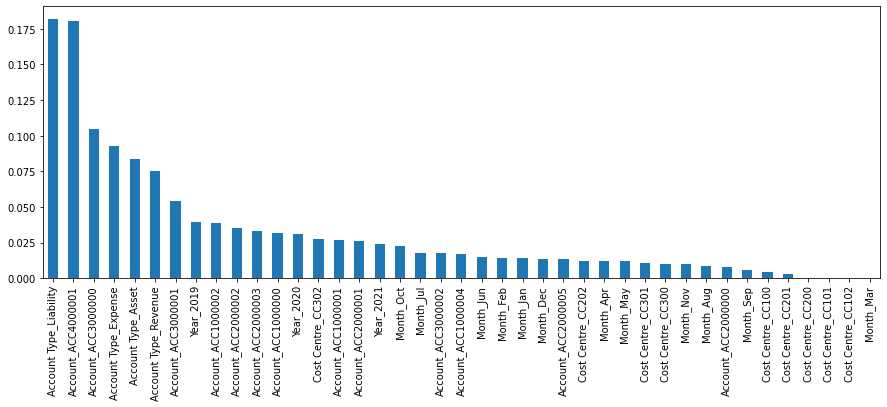

In [54]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
